In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier

In [3]:
#deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\18369\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\18369\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\18369\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\18369\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [4]:
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [24]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [25]:
## class imblance
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
X = data.drop(labels = 'Class', axis = 1)
Y = data['Class']

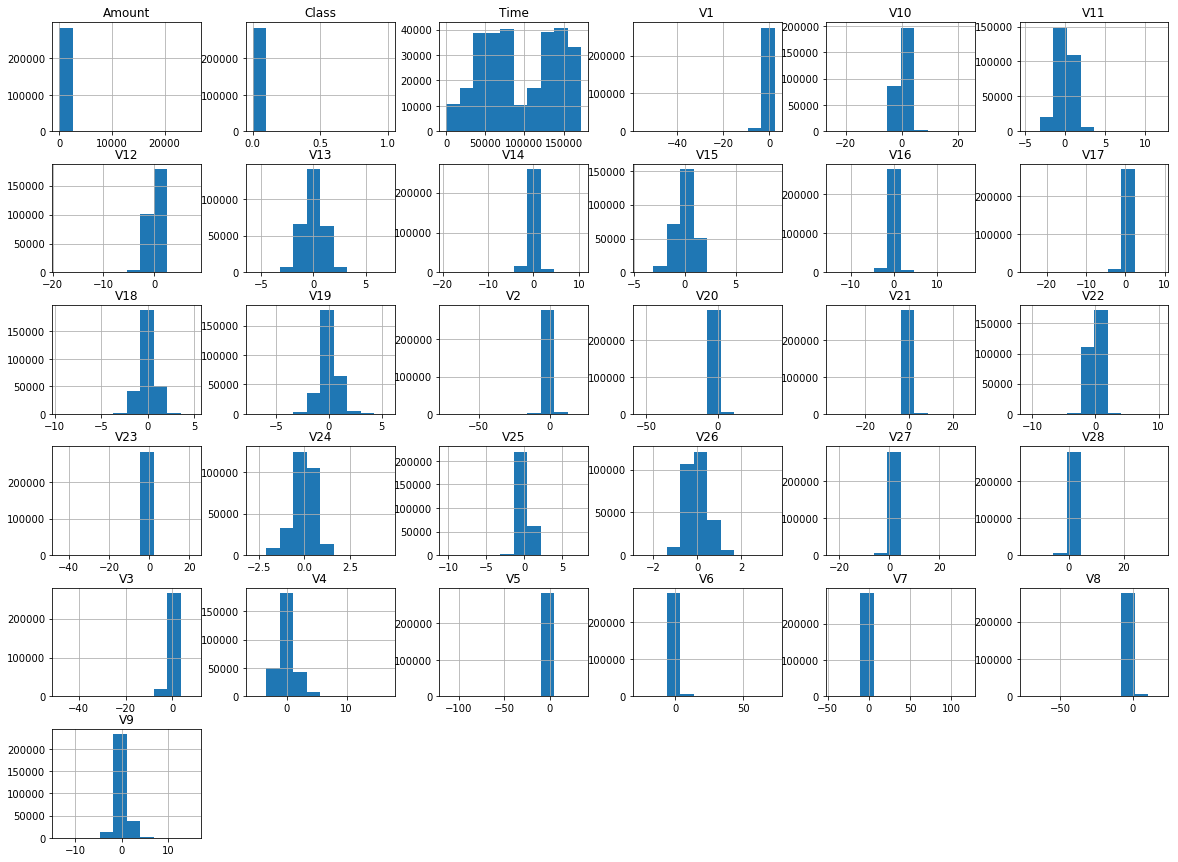

In [30]:
data.hist(figsize = (20, 15))
plt.show()

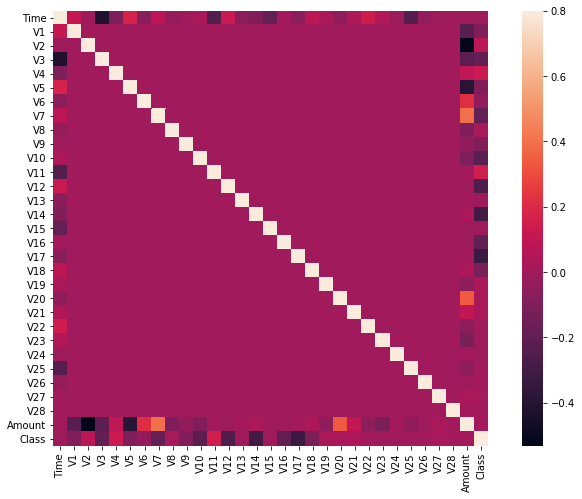

In [31]:
## correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,8))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

### Feature engineering

In [6]:
SS = StandardScaler()
X['normAmount'] = SS.fit_transform(X['Amount'].values.reshape(-1, 1))
X = X.drop(['Time', 'Amount'], axis = 1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [7]:
np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 )

In [38]:
x_train.shape, x_test.shape

((227845, 29), (56962, 29))

### Model fitting
### Neural network

In [8]:
model = Sequential([
    Dense(units=16,input_dim = 29, activation = 'relu'), ## input layer
    Dense(units=24, activation = 'relu'),
    Dropout(0.5),
    Dense(units=20, activation = 'relu'),
    Dense(units=24, activation = 'relu'),
    Dense(units=1, activation = 'sigmoid'), ## output layer
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
227845/227845 [==============================] - 46s 202us/step - loss: 0.0084 - acc: 0.9987
Epoch 2/5
227845/227845 [==============================] - 42s 185us/step - loss: 0.0038 - acc: 0.9993
Epoch 3/5
227845/227845 [==============================] - 41s 180us/step - loss: 0.0037 - acc: 0.9993
Epoch 4/5
227845/227845 [==============================] - 43s 187us/step - loss: 0.0034 - acc: 0.9993
Epoch 5/5
227845/227845 [==============================] - 53s 234us/step - loss: 0.0032 - acc: 0.9994


In [42]:
print(model.evaluate(x_test, y_test))

56962/56962 [==============================] - 1s 20us/step
[0.003537558086722429, 0.9994557775359011]


In [9]:
def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

### Logistic regression

In [11]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X,Y,'LogisticRegression_norm',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.9s finished


[0 0 0 ... 0 0 0]
Best Params : {'C': 2.7825594022071245, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9992977774656788
Confusion Matrix : 
 [[56859     9]
 [   31    63]]


In [ ]:
## XGBoost
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X,Y,'XGBoost_norm',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [12]:
## RF
param ={
            'n_estimators': [100, 500, 1000],
           
        }
FitModel(X,Y,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
## SVC
param ={
            'C': [0.1, 1, 100],
            'gamma': [0.0001, 0.001, 0.005, 0.1]
        }
FitModel(X,Y,'SVC_norm',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


## Balancing the data

In [18]:
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

In [19]:
sm0 = NearMiss(version = 2)
sm = RandomUnderSampler(random_state = 42)
X_res, Y_res = sm.fit_resample(X,Y)
pd.Series(Y_res).value_counts()

1    492
0    492
Name: Class, dtype: int64

In [20]:
X_res.shape, X.shape

((984, 29), (284807, 29))

## Logistic regression

In [21]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_res,Y_res,'LogisticRegression_US',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.8s


[0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 1 1 0 0]
Best Params : {'C': 166.81005372000593, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.95      0.96      0.95        95

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

Accuracy Score : 0.9543147208121827
Confusion Matrix : 
 [[97  5]
 [ 4 91]]


[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
C:\Users\18369\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Xgboost

In [22]:
 param = {
    'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'XGBoost_US',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   11.5s finished


[0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 1 0 1 1 0 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.98      0.96       102
           1       0.98      0.94      0.96        95

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

Accuracy Score : 0.9593908629441624
Confusion Matrix : 
 [[100   2]
 [  6  89]]


## Random forest

In [23]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'Random Forest_US',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   26.8s finished


[0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 1 0 1 1 0 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.98      0.95      0.96        95

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

Accuracy Score : 0.9644670050761421
Confusion Matrix : 
 [[100   2]
 [  5  90]]


## Neural networks

In [24]:
np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res, test_size = 0.2)
x_train.shape

(787, 29)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
787/787 [==============================] - 1s 900us/step - loss: 0.6357 - acc: 0.5006
Epoch 2/5
787/787 [==============================] - 0s 96us/step - loss: 0.4870 - acc: 0.7128
Epoch 3/5
787/787 [==============================] - 0s 125us/step - loss: 0.3789 - acc: 0.8475
Epoch 4/5
787/787 [==============================] - 0s 114us/step - loss: 0.2913 - acc: 0.9085
Epoch 5/5
787/787 [==============================] - 0s 113us/step - loss: 0.2426 - acc: 0.9174


In [26]:
print(model.evaluate(x_test,y_test))

197/197 [==============================] - 0s 408us/step
[0.16735442043258453, 0.9441624365482234]


## Over sampling

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm =SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(X,Y)

In [29]:
pd.Series(Y_res_OS).value_counts()

1    284315
0    284315
Name: Class, dtype: int64

## Neural network

In [30]:
np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X_res_OS,Y_res_OS, test_size = 0.2)
x_train.shape

(454904, 29)

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5,validation_data=[x_test,y_test])

Train on 454904 samples, validate on 113726 samples
Epoch 1/5
454904/454904 [==============================] - 60s 132us/step - loss: 0.0379 - acc: 0.9871 - val_loss: 0.0182 - val_acc: 0.9946
Epoch 2/5
454904/454904 [==============================] - 58s 128us/step - loss: 0.0180 - acc: 0.9950 - val_loss: 0.0167 - val_acc: 0.9945
Epoch 3/5
454904/454904 [==============================] - 61s 134us/step - loss: 0.0148 - acc: 0.9960 - val_loss: 0.0110 - val_acc: 0.9972
Epoch 4/5
454904/454904 [==============================] - 42s 93us/step - loss: 0.0128 - acc: 0.9967 - val_loss: 0.0090 - val_acc: 0.9981
Epoch 5/5
454904/454904 [==============================] - 41s 89us/step - loss: 0.0117 - acc: 0.9971 - val_loss: 0.0091 - val_acc: 0.9978


In [33]:
print(model.evaluate(x_test,y_test))

113726/113726 [==============================] - 2s 21us/step
[0.009130275748002755, 0.9978017339922269]


In [35]:
## logistic regression
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_res_OS,Y_res_OS,'LogisticRegression_OS',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


[1 1 0 ... 0 1 1]
Best Params : {'C': 3593.813663804626, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56989
           1       0.97      0.92      0.95     56737

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Accuracy Score : 0.9468371348680161
Confusion Matrix : 
 [[55631  1358]
 [ 4688 52049]]


In [ ]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005]
        }
FitModel(X_res_OS,Y_res_OS,'SVC_norm',SVC(),param,cv=5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
